In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 데이터 읽기
# df = pd.read_csv('/content/drive/MyDrive/data(main)/Metro_Interstate_Traffic_Volume.csv')
df = pd.read_csv('./data/Metro_Interstate_Traffic_Volume.csv')

df[0:100]

In [117]:
# holiday 변수의 unique 값 확인
df['holiday'].unique()

array([nan, 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

d:\Users\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


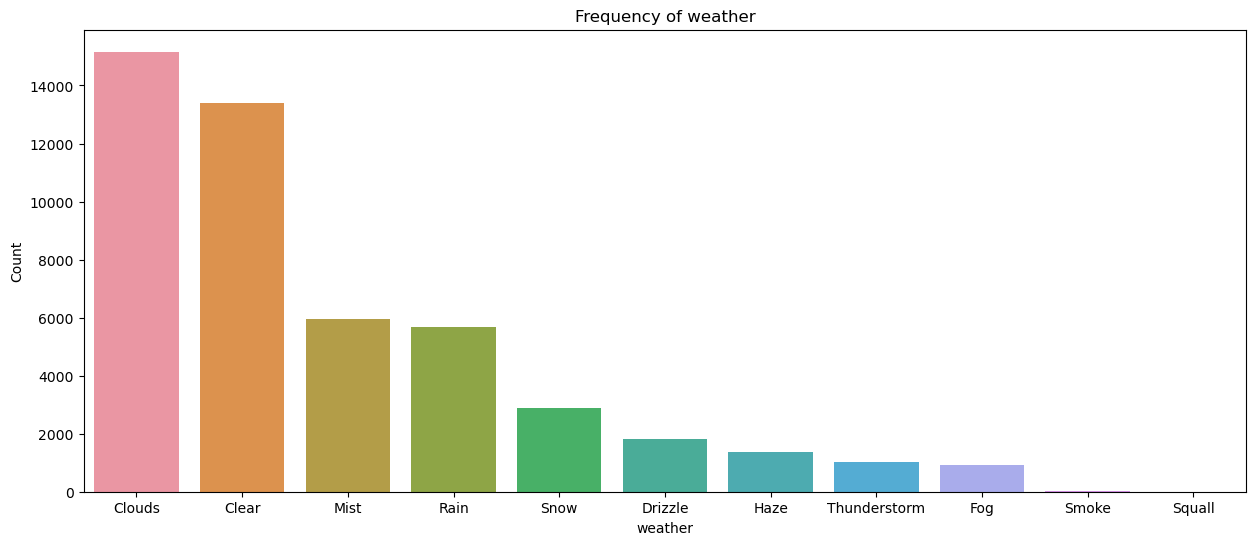

weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64


In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IsHoliday 변수의 빈도를 계산
holiday_counts = df['weather_main'].value_counts()

# 그래프 설정
plt.figure(figsize=(15, 6))
sns.barplot(x=holiday_counts.index, y=holiday_counts.values)
plt.xlabel('weather')
plt.ylabel('Count')
plt.title('Frequency of weather')
plt.show()
print(holiday_counts)

In [121]:
# kelvin을 celcius로 변환
df['temp']=df['temp']-273.15 

In [120]:
# holiday를 1 non holiday는 0으로 변환
specific_holidays = ['Columbus Day', 'Veterans Day', 'Thanksgiving Day', 'Christmas Day', 'New Years Day', 'Washingtons Birthday', 'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day', 'Martin Luther King Jr Day']
df['holiday'] = df['holiday'].apply(lambda x: 1 if x in specific_holidays else 0)

df[0:100]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,0,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,0,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,0,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,0,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
95,0,6.85,0.0,0.0,75,Clouds,broken clouds,2012-10-06 15:00:00,5153
96,0,5.91,0.0,0.0,90,Clouds,overcast clouds,2012-10-06 16:00:00,5024
97,0,5.76,0.0,0.0,90,Clouds,overcast clouds,2012-10-06 17:00:00,4779
98,0,5.24,0.0,0.0,90,Clouds,overcast clouds,2012-10-06 18:00:00,4362


d:\Users\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


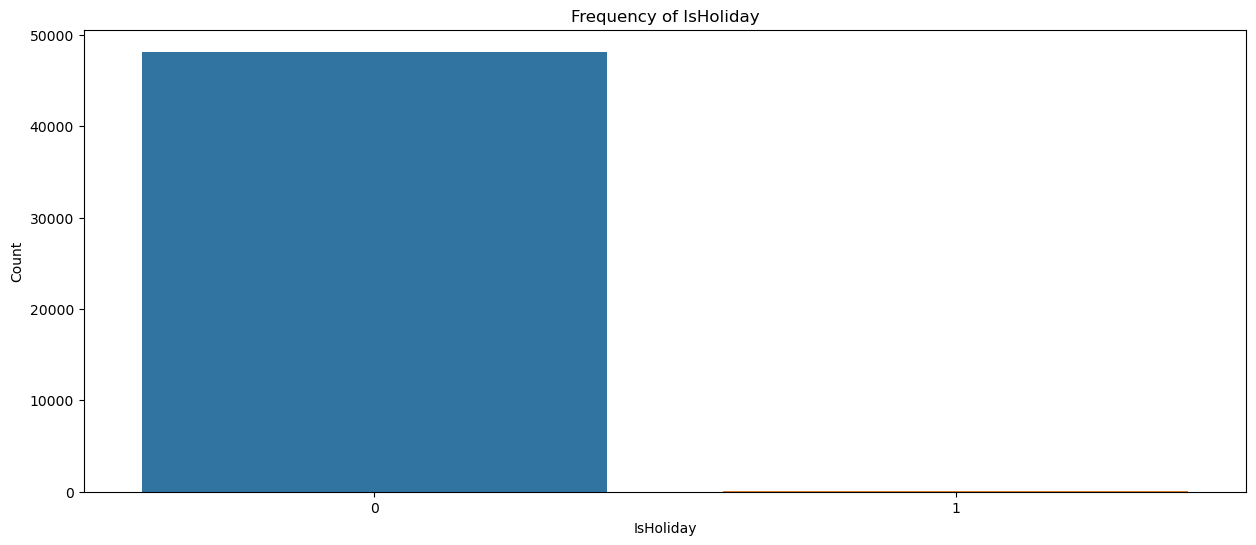

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IsHoliday 변수의 빈도를 계산
holiday_counts = df['holiday'].value_counts()

# 그래프 설정
plt.figure(figsize=(15, 6))
sns.barplot(x=holiday_counts.index, y=holiday_counts.values)
plt.xlabel('IsHoliday')
plt.ylabel('Count')
plt.title('Frequency of IsHoliday')
plt.show()

In [123]:
print(holiday_counts)

holiday
0    48143
1       61
Name: count, dtype: int64


#데이터 전처리


In [124]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [125]:
df.isna().sum() # 결측치 없으므로 결측치 제거는 넘어감

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [127]:
# date_time 변수의 type 설정
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')

In [128]:
df['date_time']

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [129]:
# weather_main 칼럼 label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['weather_main'] = encoder.fit_transform(df['weather_main'])

In [130]:
# rain 이상치 제거
df = df[df['rain_1h'] <= 2000]
print(df['rain_1h'].max())

55.63


In [296]:
import pandas as pd

# 필요한 열만 선택
selected_columns =[ 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'date_time', 'traffic_volume']
traffic_df = df[selected_columns]

In [297]:
traffic_df[traffic_df.duplicated(['date_time'], keep = False)] # 중복된 time data 확인

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume
178,0,-265.05,0.0,0.0,99,6,2012-10-10 07:00:00,6793
179,0,-265.05,0.0,0.0,99,2,2012-10-10 07:00:00,6793
180,0,-266.20,0.0,0.0,99,6,2012-10-10 08:00:00,6283
181,0,-266.20,0.0,0.0,99,2,2012-10-10 08:00:00,6283
182,0,-266.69,0.0,0.0,99,6,2012-10-10 09:00:00,5680
...,...,...,...,...,...,...,...,...
48173,0,-265.62,0.0,0.0,90,1,2018-09-29 19:00:00,3818
48192,0,-262.82,0.0,0.0,90,6,2018-09-30 14:00:00,4380
48193,0,-262.82,0.0,0.0,90,2,2018-09-30 14:00:00,4380
48194,0,-262.46,0.0,0.0,75,6,2018-09-30 15:00:00,4302


In [298]:
# 중복된 행 제거
traffic_df.drop_duplicates(inplace=True)
traffic_df.drop_duplicates(['date_time'], inplace=True)

# 결과 확인
print(len(df)) # raw data: 48,203개
print(len(traffic_df)) # 중복 삭제 후: 40,574개

48203
40574


C:\Users\doyeo\AppData\Local\Temp\ipykernel_4928\716477828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_df.drop_duplicates(inplace=True)
C:\Users\doyeo\AppData\Local\Temp\ipykernel_4928\716477828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_df.drop_duplicates(['date_time'], inplace=True)


In [300]:
# 누락된 시간 데이터 확인
expected_dates = pd.date_range(start=traffic_df['date_time'].min(), end=traffic_df['date_time'].max(), freq='H')
missing_dates = expected_dates.difference(traffic_df['date_time'])

print("누락된 날짜:")
print(missing_dates)
len(missing_dates) # 누락데이터 개수: 11,977개

누락된 날짜:
DatetimeIndex(['2012-10-03 07:00:00', '2012-10-03 10:00:00',
               '2012-10-03 11:00:00', '2012-10-03 17:00:00',
               '2012-10-05 02:00:00', '2012-10-05 04:00:00',
               '2012-10-06 03:00:00', '2012-10-07 01:00:00',
               '2012-10-07 02:00:00', '2012-10-09 03:00:00',
               ...
               '2018-03-24 05:00:00', '2018-03-24 06:00:00',
               '2018-03-24 07:00:00', '2018-03-29 02:00:00',
               '2018-05-05 02:00:00', '2018-06-02 02:00:00',
               '2018-08-07 07:00:00', '2018-08-07 08:00:00',
               '2018-08-07 09:00:00', '2018-08-23 02:00:00'],
              dtype='datetime64[ns]', length=11977, freq=None)


11977

In [301]:
# 누락 데이터 보간 linear interpolate(선형 보간)
traffic_df = traffic_df.set_index('date_time').reindex(expected_dates)
traffic_df = traffic_df.interpolate(method='linear')
traffic_df = traffic_df.reset_index().rename(columns={'index': 'date_time'})

print(traffic_df.isna().sum())
print(traffic_df.info()) # 최종 데이터 개수: 52,551개

date_time         0
holiday           0
temp              0
rain_1h           0
snow_1h           0
clouds_all        0
weather_main      0
traffic_volume    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52551 entries, 0 to 52550
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_time       52551 non-null  datetime64[ns]
 1   holiday         52551 non-null  float64       
 2   temp            52551 non-null  float64       
 3   rain_1h         52551 non-null  float64       
 4   snow_1h         52551 non-null  float64       
 5   clouds_all      52551 non-null  float64       
 6   weather_main    52551 non-null  float64       
 7   traffic_volume  52551 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 3.2 MB
None


In [302]:
# preprocessed 파일 저장
traffic_df.to_csv('./data/traffic_volume_preprocessed_2.csv', index=False)
# traffic_df.to_csv('/content/drive/MyDrive/traffic_volume_preprocessed_2.csv', index=False)

d:\Users\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


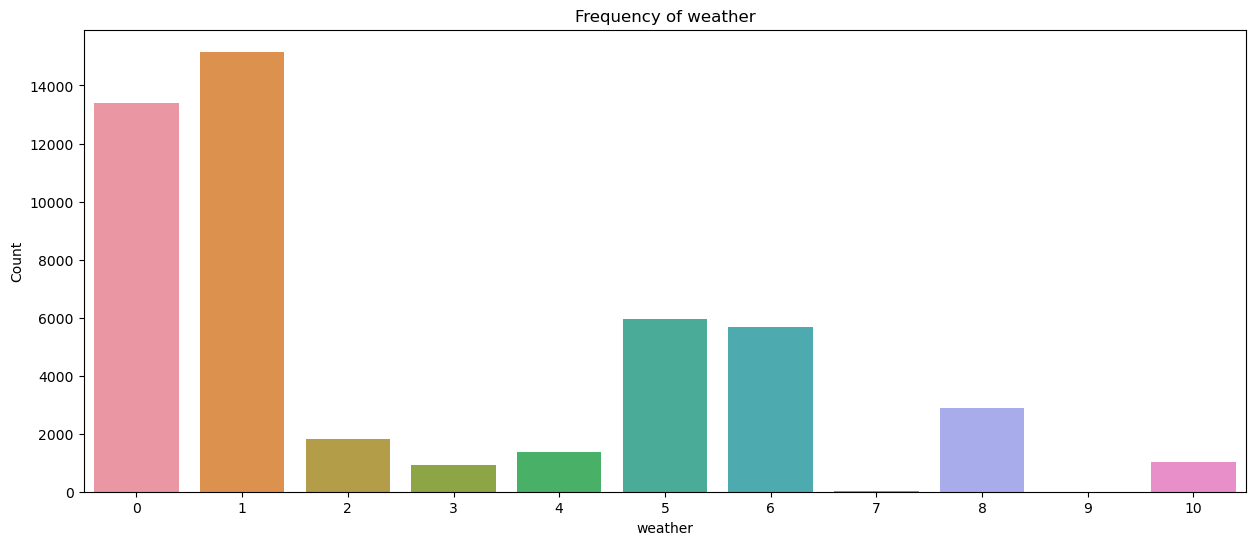

weather_main
1     15164
0     13391
5      5950
6      5671
8      2876
2      1821
4      1360
10     1034
3       912
7        20
9         4
Name: count, dtype: int64


In [290]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IsHoliday 변수의 빈도를 계산
holiday_counts = df['weather_main'].value_counts()

# 그래프 설정
plt.figure(figsize=(15, 6))
sns.barplot(x=holiday_counts.index, y=holiday_counts.values)
plt.xlabel('weather')
plt.ylabel('Count')
plt.title('Frequency of weather')
plt.show()
print(holiday_counts)

#온도 이상치 제거


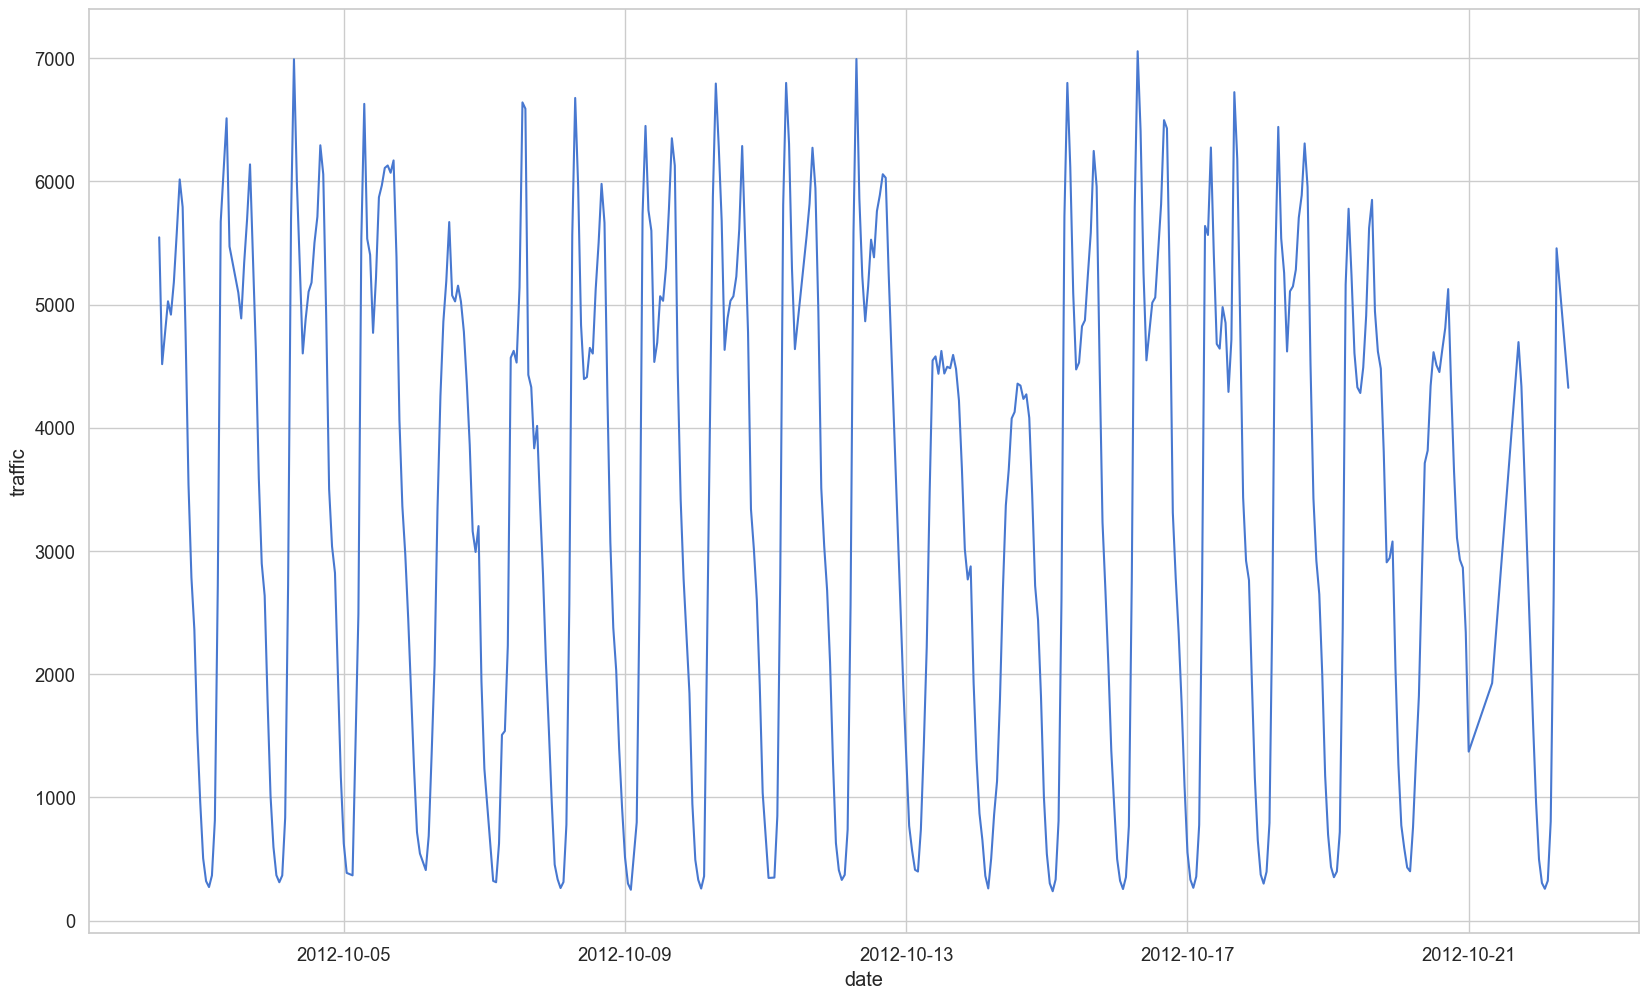

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20,12
sns.set(style='whitegrid', palette='muted', font_scale=1.2)



plt.plot(df['date_time'][0:500],df['traffic_volume'][0:500])
plt.xlabel('date')
plt.ylabel('traffic')
plt.show()

In [303]:
filtered_data = traffic_df[traffic_df['date_time'] > '2014-01-01 09:00:00']

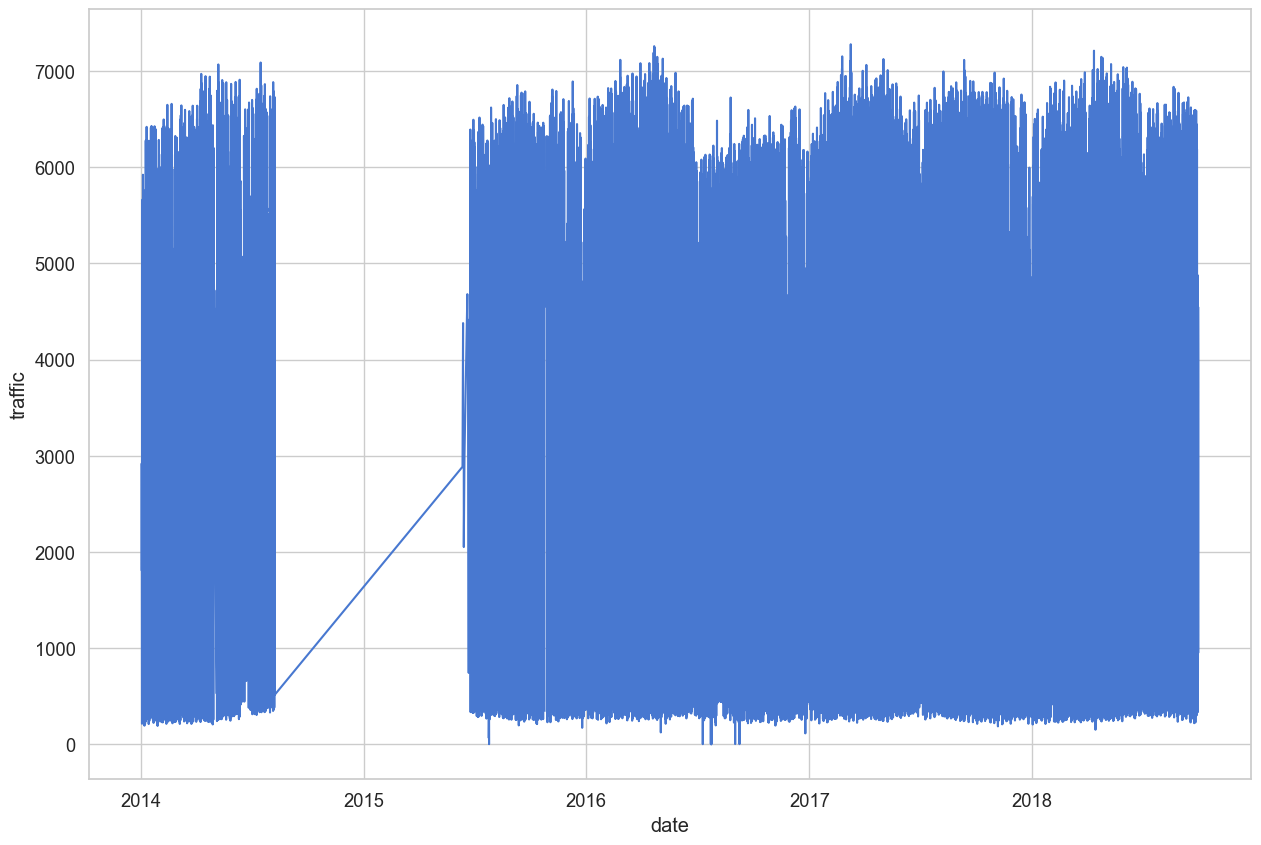

<Figure size 2000x1200 with 0 Axes>

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 그래프 크기 설정
plt.figure(figsize=(15, 10))
plt.plot(filtered_data['date_time'],filtered_data['traffic_volume'])
plt.xlabel('date')
plt.ylabel('traffic')
plt.show()



# 그래프 출력
plt.tight_layout()
plt.show()

#45개의 그래프 모두 그리는 경우

d:\Users\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


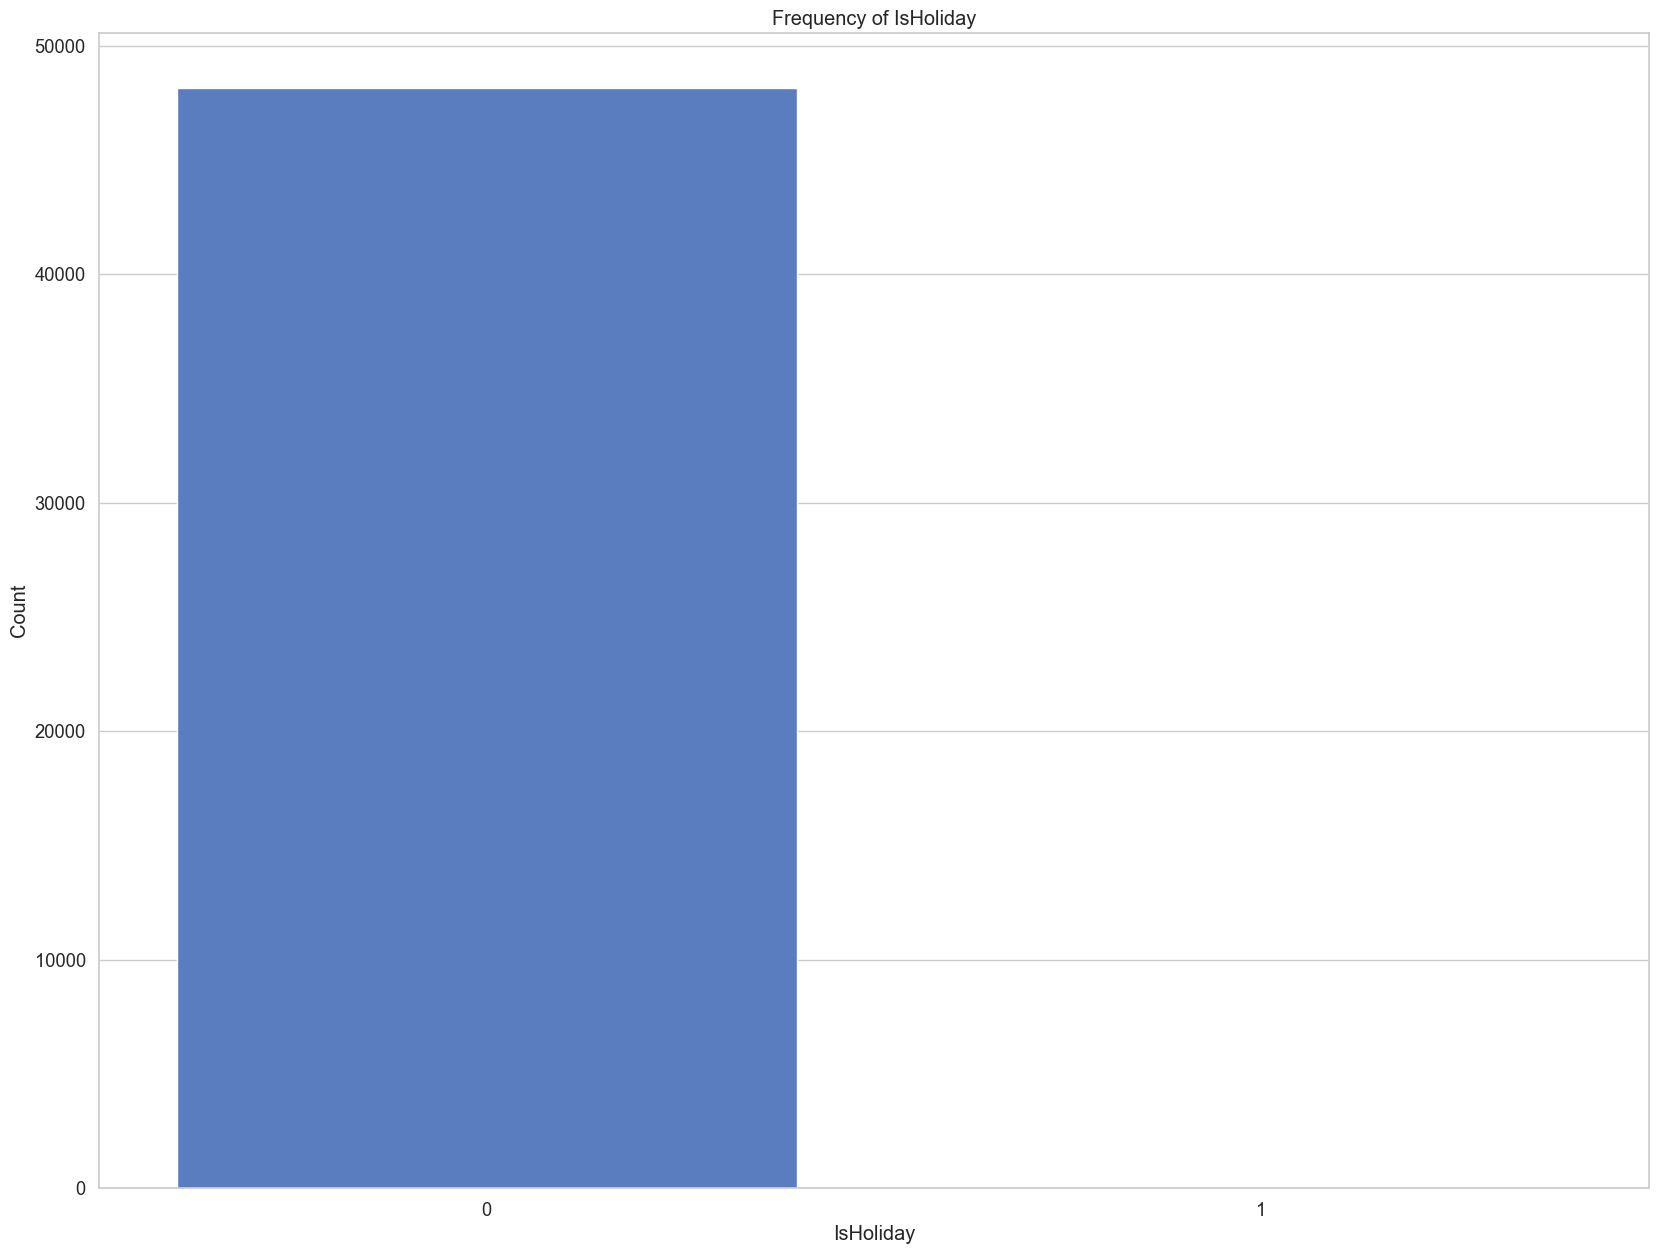

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IsHoliday 변수의 빈도를 계산
holiday_counts = df['holiday'].value_counts()

# 그래프 설정
plt.figure(figsize=(20, 15))
sns.barplot(x=holiday_counts.index, y=holiday_counts.values)
plt.xlabel('IsHoliday')
plt.ylabel('Count')
plt.title('Frequency of IsHoliday')
plt.show()

#변수별 그래프 보여줄때 참고하기

---




#전처리 코드 - EDA 끝나고 여기부터 실행

*   여기서부터 전처리된 데이터로 사용
*   스케일링과 traintest셋 분할 하는 과정

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from collections import deque

In [3]:
# traffic_df=pd.read_csv('/content/drive/MyDrive/traffic_volume_preprocessed.csv') #기존의 EDA된 데이터 불러오기
traffic_df=pd.read_csv('./data/traffic_volume_preprocessed_2.csv')

In [4]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52551 entries, 0 to 52550
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_time       52551 non-null  object 
 1   holiday         52551 non-null  float64
 2   temp            52551 non-null  float64
 3   rain_1h         52551 non-null  float64
 4   snow_1h         52551 non-null  float64
 5   clouds_all      52551 non-null  float64
 6   weather_main    52551 non-null  float64
 7   traffic_volume  52551 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.2+ MB


In [5]:
#train_test분리
def data_split(df):
    n = len(df)
    train_df = df[0:int(n*0.5)]
    test_df = df[int(n*0.5):]
    c = df.shape[1]
    return train_df, test_df, c

In [6]:
def x_window_re(x, size):
    a = []  # 빈 리스트 생성
    for i in range(len(x) - size + 1):
        a.append(x[i:i + size])

    return np.array(a)  # 리스트-> df

def y_window_re(x, size):
    a = []  # 빈 리스트 생성
    for i in range(len(x) - size + 1):
        a.append(x[i:i + size])

    return np.array(a)

In [7]:
traffic_df =traffic_df[['traffic_volume','date_time']]
traffic_df.set_index('date_time', inplace=True)

In [8]:
print(traffic_df)

                     traffic_volume
date_time                          
2012-10-02 09:00:00          5545.0
2012-10-02 10:00:00          4516.0
2012-10-02 11:00:00          4767.0
2012-10-02 12:00:00          5026.0
2012-10-02 13:00:00          4918.0
...                             ...
2018-09-30 19:00:00          3543.0
2018-09-30 20:00:00          2781.0
2018-09-30 21:00:00          2159.0
2018-09-30 22:00:00          1450.0
2018-09-30 23:00:00           954.0

[52551 rows x 1 columns]


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# StandardScaler 사용
scaler = StandardScaler()

traffic_df= pd.DataFrame(scaler.fit_transform(traffic_df))

x_train, x_test, x_nf=data_split(traffic_df)
y_train, y_test, y_nf=data_split(traffic_df)

In [10]:
print(traffic_df.shape)
print(x_train.shape)

(52551, 1)
(42040, 1)


In [11]:
x_train

,0
0,1.286337
1,0.751131
2,0.881682
3,1.016394
4,0.960221
...,...
42035,-0.139318
42036,-0.133597
42037,-0.542413
42038,-0.959031


#슬라이딩 윈도우

In [12]:
#슬라이딩 윈도우
WINDOW_SIZE=24 #임시로 둔 24시간 기준
x_train_window = x_window_re(x_train, WINDOW_SIZE)
y_train_window = y_window_re(y_train, WINDOW_SIZE)

x_test_window = x_window_re(x_test, WINDOW_SIZE)
y_test_window = y_window_re(y_test, WINDOW_SIZE)

In [13]:
x_train_window.shape

(42017, 24, 1)

In [14]:
y_train_window.shape

(42017, 24, 1)

#여기서부터 실행코드


In [15]:
# 하이퍼 파라미터
LEARNING_RATE = 0.01
BATCH_SIZE = 256
EPOCHS = 10
PCA_COMPONENT = 4
TRAINDATA = '교통량_train_windowsize_24.npz'
TESTDATA = '교통량_test_windowsize_24.npz'
window_size =WINDOW_SIZE

#LSTM

In [16]:
print(x_train_window.shape)
print(y_train_window.shape)
print(x_test_window.shape)
print(y_test_window.shape)

(42017, 24, 1)
(42017, 24, 1)
(10488, 24, 1)
(10488, 24, 1)


In [17]:
x_test_window=np.delete(x_test_window, len(x_test_window) - 1, axis=0)
y_test_window=np.delete(y_test_window, len(y_test_window) - 1, axis=0)

In [18]:
x_train.shape

(42040, 1)

In [19]:
x_nf

1

#Training 시작

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 10)            480       
                                                                 
 dropout (Dropout)           (None, 24, 10)            0         
                                                                 
 dense (Dense)               (None, 24, 1)             11        
                                                                 
Total params: 491 (1.92 KB)
Trainable params: 491 (1.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1314/1314 [==============================] - 21s 14ms/step - loss: 0.1456 - mae: 0.2468 - val_loss: 0.0098 - val_mae: 0.0614
Epoch 2/200
1314/1314 [==============================] - 31s 24ms/step - loss: 0.0422 - mae: 0.1388 - val_loss: 0.0026 - val_mae: 0.0353
Epoch 3/200
13

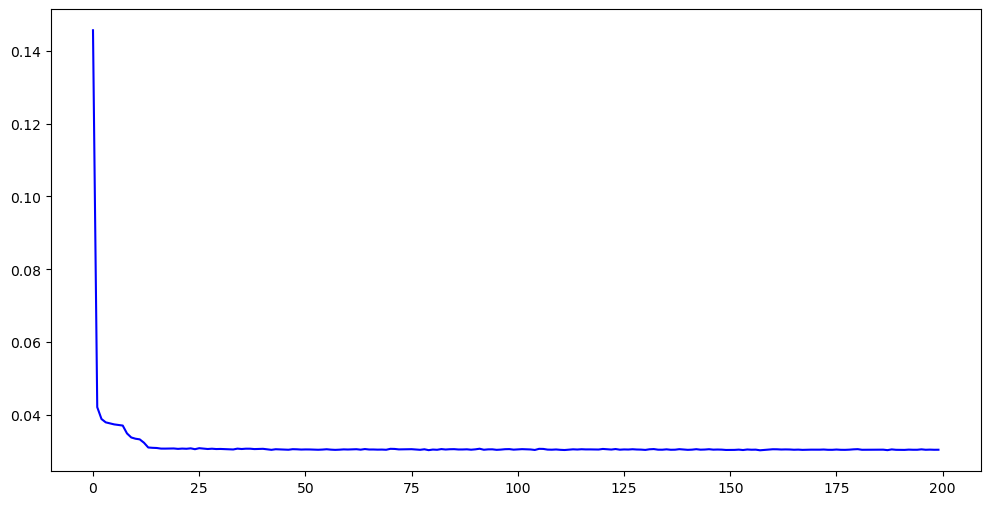

In [20]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
#early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)  ,  callbacks=[early_stop]

model = keras.Sequential()
model = keras.Sequential()
model.add(keras.layers.LSTM(10, activation='relu',  return_sequences=True,input_shape=(24, x_nf)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1, activation='linear'))  # 'linear' 활성화 함수 사용
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])  # MSE 손실 함수 사용

history=model.fit(x_train_window, y_train_window, validation_data=(x_test_window,y_test_window), epochs=200)

# 모델 평가
y_pred1 = model.predict(x_test_window)

# R^2
r2 = r2_score(y_test_window.sum(axis=1), y_pred1.sum(axis=1))#열기준 합을 비교
print("R^2:", r2)

# MSE
mse = mean_squared_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MSE:", mse)

# MAE
mae = mean_absolute_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MAE:", mae)
loss_history1 = history.history['loss']

#MAPE
mape = mean_absolute_percentage_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MAPE:", mape)

plt.figure(figsize=(12, 6))
plt.plot(loss_history1, label='loss', linestyle='-', marker='',color='blue')

In [22]:
y_pred1

array([[[-1.3008134 ],
        [-1.3714225 ],
        [-1.3578383 ],
        ...,
        [-0.36564213],
        [-0.7797179 ],
        [-1.1055067 ]],

       [[-1.3674035 ],
        [-1.3597682 ],
        [-1.0797881 ],
        ...,
        [-0.7797179 ],
        [-1.1055067 ],
        [-1.2658951 ]],

       [[-1.355491  ],
        [-1.0818318 ],
        [-0.0323799 ],
        ...,
        [-1.1055067 ],
        [-1.2658951 ],
        [-1.3827606 ]],

       ...,

       [[-0.05560068],
        [-0.22929591],
        [ 0.3996715 ],
        ...,
        [ 0.44508117],
        [ 0.2410931 ],
        [-0.1441339 ]],

       [[-0.22943574],
        [ 0.39936337],
        [-0.63106424],
        ...,
        [ 0.2410931 ],
        [-0.1441339 ],
        [-0.4571641 ]],

       [[ 0.4003225 ],
        [-0.6293739 ],
        [-1.0872031 ],
        ...,
        [-0.1441339 ],
        [-0.4571641 ],
        [-0.82041454]]], dtype=float32)

In [23]:
 y_test_window.shape

(10487, 24, 1)

In [24]:
y_test_window[:,1]

array([[-1.40997735],
       [-1.39749441],
       [-1.11402768],
       ...,
       [-0.24178236],
       [ 0.40785056],
       [-0.64799798]])

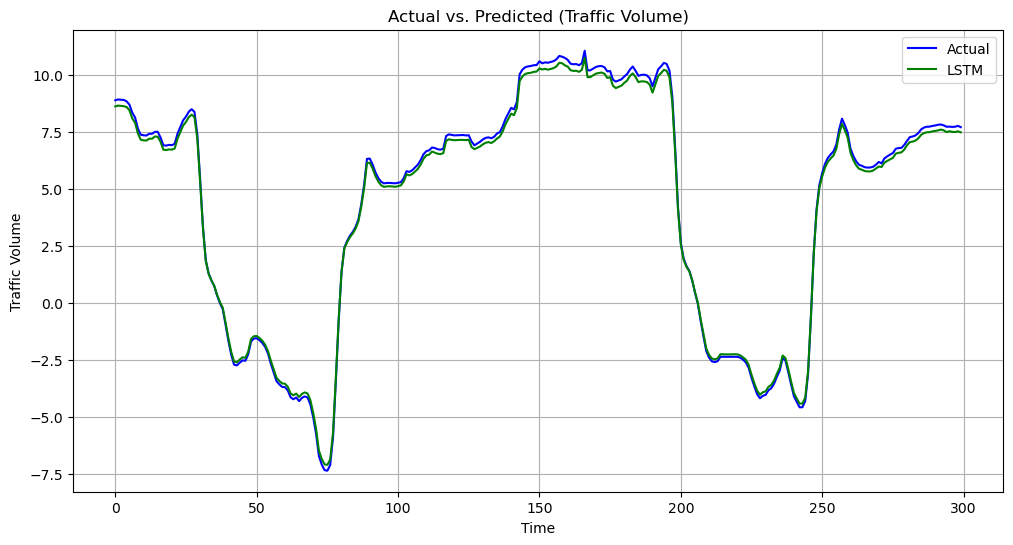

In [25]:
import matplotlib.pyplot as plt

# 실제값
actual_values = y_test_window.sum(axis=1)

import numpy as np

actual_values = np.array(actual_values)

# 예측값
pred1 = y_pred1.sum(axis=1)

# 시간 단계 생성 (예: 1, 2, 3, ...)
time_steps = range(len(actual_values))

# 하나의 시간 창 선택 (예: 0번째 시간 창)
time_window_index = 1

# traffic_volume 데이터 선택
traffic_volume_actual = actual_values[:, 0]
traffic_volume_pred1 = pred1[:, 0]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(time_steps[:300], traffic_volume_actual[:300], label='Actual', linestyle='-', marker='', color='blue')  # 실선, 마커 없음
plt.plot(time_steps[:300], traffic_volume_pred1[:300], label='LSTM', linestyle='-', marker='', color='green')  # 점선, 마커 없음

plt.title('Actual vs. Predicted (Traffic Volume)')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
print(y_pred1.shape)
print(y_test_window.shape)
print(x_train_window.shape)

(10487, 24, 1)
(10487, 24, 1)
(42017, 24, 1)


#GRU

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 10)            390       
                                                                 
 dropout_1 (Dropout)         (None, 24, 10)            0         
                                                                 
 dense_1 (Dense)             (None, 24, 1)             11        
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1314/1314 [==============================] - 24s 15ms/step - loss: 0.2079 - mae: 0.2686 - val_loss: 0.0131 - val_mae: 0.0740
Epoch 2/200
1314/1314 [==============================] - 17s 13ms/step - loss: 0.0597 - mae: 0.1457 - val_loss: 0.0071 - val_mae: 0.0636
Epoch 3/200
13

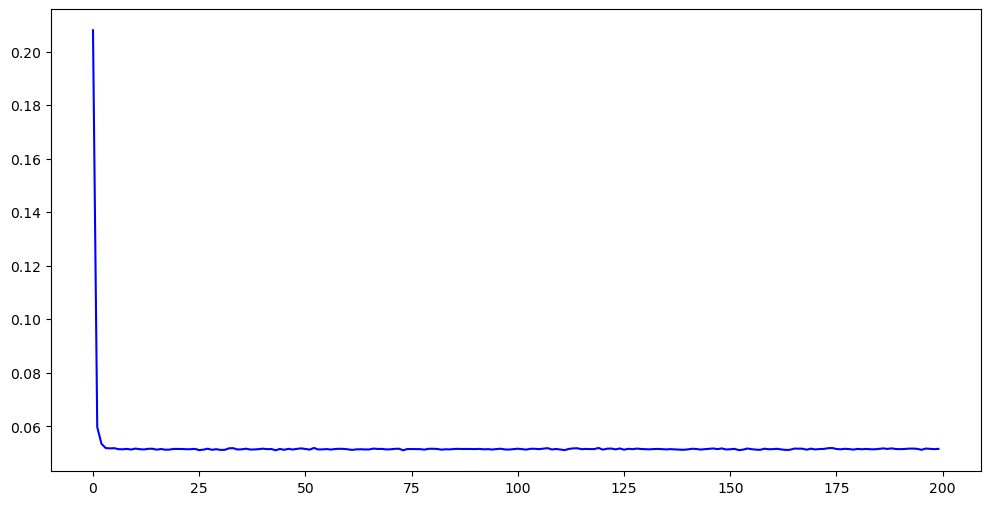

In [27]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model = keras.Sequential()
model = keras.Sequential()
model.add(keras.layers.GRU(10, activation='relu',  return_sequences=True,input_shape=(24, x_nf)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1, activation='linear'))  # 'linear' 활성화 함수 사용
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])  # MSE 손실 함수 사용

history=model.fit(x_train_window, y_train_window, validation_data=(x_test_window,y_test_window), epochs=200)
# history=model.fit(x_train_window, y_train_window, validation_data=(x_test_window,y_test_window), epochs=200,  callbacks=[early_stop])


# 모델 평가
y_pred1 = model.predict(x_test_window)

# R^2
r2 = r2_score(y_test_window.sum(axis=1), y_pred1.sum(axis=1))#열기준 합을 비교
print("R^2:", r2)

# MSE
mse = mean_squared_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MSE:", mse)

# MAE
mae = mean_absolute_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MAE:", mae)
loss_history1 = history.history['loss']

#MAPE
mape = mean_absolute_percentage_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MAPE:", mape)


plt.figure(figsize=(12, 6))
plt.plot(loss_history1, label='loss', linestyle='-', marker='',color='blue')

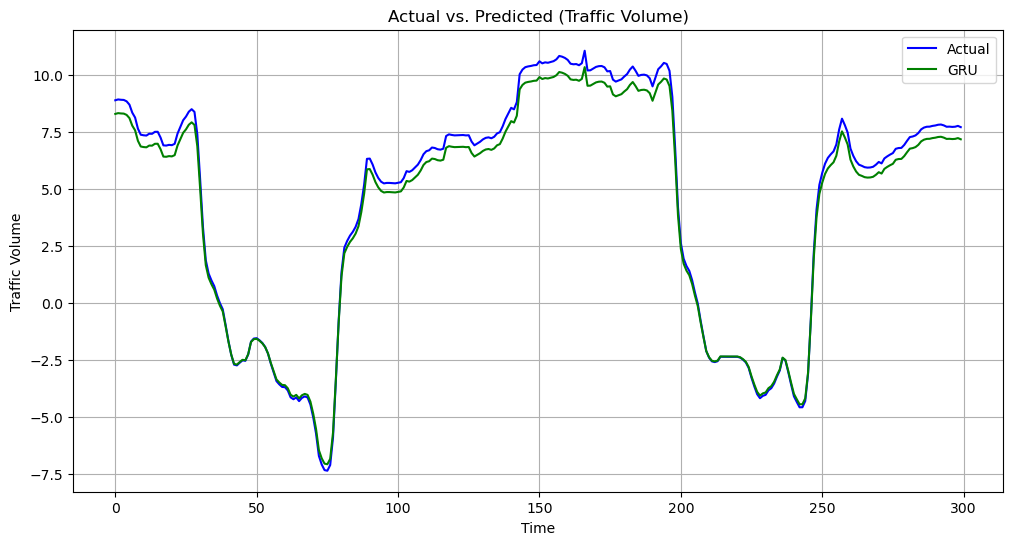

In [28]:
import matplotlib.pyplot as plt

# 실제값
actual_values = y_test_window.sum(axis=1)
import numpy as np

actual_values = np.array(actual_values)

# 예측값
pred1 = y_pred1.sum(axis=1)

# 시간 단계 생성 (예: 1, 2, 3, ...)
time_steps = range(len(actual_values))

# 하나의 시간 창 선택 (예: 0번째 시간 창)
time_window_index = 1

# traffic_volume 데이터 선택
traffic_volume_actual = actual_values[:, 0]
traffic_volume_pred1 = pred1[:, 0]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(time_steps[:300], traffic_volume_actual[:300], label='Actual', linestyle='-', marker='', color='blue')  # 실선, 마커 없음
plt.plot(time_steps[:300], traffic_volume_pred1[:300], label='GRU', linestyle='-', marker='', color='green')  # 점선, 마커 없음

plt.title('Actual vs. Predicted (Traffic Volume)')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
x_train.shape

(42040, 1)

#cnn-lstm

#최종 cnn-lstm

d:\Users\Programs\anaconda3\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 11, 32)            0         
 D)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 11, 32)            8320      
                                                                 
 flatten (Flatten)           (None, 352)               0         
                                                                 
 dense_2 (Dense)             (None, 24)                8472      
                                                                 
Total params: 16920 (66.09 KB)
Trainable params: 16920 (66.09 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

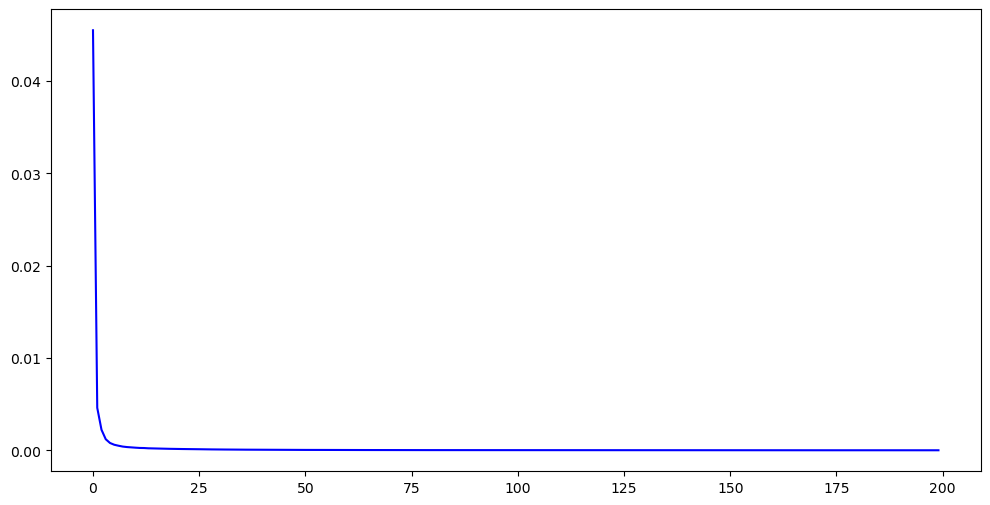

In [30]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, concatenate, Embedding, Flatten, GRU
import numpy as np
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense
import tensorflow_addons as tfa

model = keras.Sequential()
model.add(keras.layers.Conv1D(32, 3, activation='relu', input_shape=(24, x_nf)))
model.add(MaxPooling1D(2))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Flatten())
model.add(Dense(24, activation='linear'))  # Output shape set to 1

model.summary()

# early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)
model.compile(loss='mean_squared_error', optimizer='adam', metrics='mae')

history = model.fit(x_train_window, y_train_window, validation_data=(x_test_window, y_test_window), epochs=200)
# history = model.fit(x_train_window, y_train_window, validation_data=(x_test_window, y_test_window), epochs=1000, callbacks=[early_stop])


# 모델 평가
y_pred1 = model.predict(x_test_window)

# R^2
r2 = r2_score(y_test_window.sum(axis=1), y_pred1.sum(axis=1))  # 열기준 합을 비교
print("R^2:", r2)

# MSE
mse = mean_squared_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MSE:", mse)

# MAE
mae = mean_absolute_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MAE:", mae)

#MAPE
mape = mean_absolute_percentage_error(y_test_window.sum(axis=1), y_pred1.sum(axis=1))
print("MAPE:", mape)

loss_history1 = history.history['loss']

plt.figure(figsize=(12, 6))
plt.plot(loss_history1, label='loss', linestyle='-', marker='', color='blue')
plt.show()


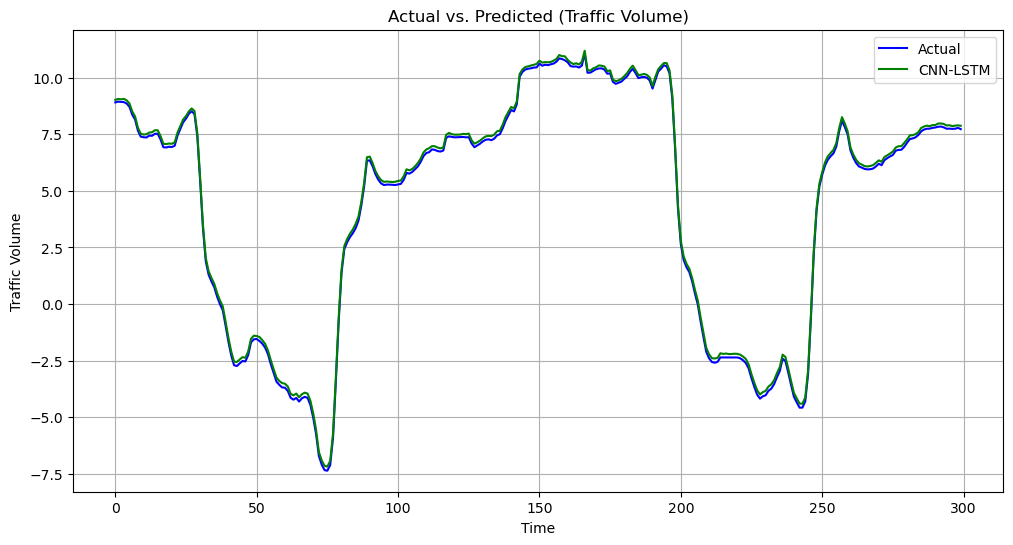

In [31]:
import matplotlib.pyplot as plt

# 실제값
actual_values = y_test_window.sum(axis=1)
actual_values = np.array(actual_values)

# 예측값
pred1 = y_pred1.sum(axis=1)

# 시간 단계 생성 (예: 1, 2, 3, ...)
time_steps = range(len(actual_values))

# traffic_volume 데이터 선택
traffic_volume_actual = actual_values[:, 0]
traffic_volume_pred1 = pred1

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(time_steps[:300], traffic_volume_actual[:300], label='Actual', linestyle='-', marker='', color='blue')  # 실선, 마커 없음
plt.plot(time_steps[:300], traffic_volume_pred1[:300], label='CNN-LSTM', linestyle='-', marker='', color='green')  # 점선, 마커 없음

plt.title('Actual vs. Predicted (Traffic Volume)')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()
